# CVIT Summer Workshop 2020

Day 02: Basic Image Processing

Instructors: Sanjana Gunna, Aditya Aggarwal

In [1]:
import numpy as np
import cv2

import matplotlib.pyplot as plt

from matplotlib import pyplot as plt

from skimage import io
from skimage import morphology as morp

import plotly
import plotly.express as px
import plotly.graph_objects as go

## Exercise 01: Fundamentals

1. Read `lena.png` and print the dimensions.
2. Read `chair.png` and print the dimensions.
3. Verify if you are getting 4 channels in `chair.png`.
4. Plot the mask of the chair in the image `chair.png`.

In [2]:
I1 = cv2.imread('./Image Processing/lena.png')
print(I1.shape)

(512, 512, 3)


In [3]:
cv2.imshow('lena.png', I1)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [4]:
I2 = cv2.imread('./Image Processing/chair.png', cv2.IMREAD_UNCHANGED)
print(I2.shape)
cv2.imshow('Chair', I2)
cv2.waitKey(0)
cv2.destroyAllWindows()

(137, 137, 4)


In [5]:
cv2.imshow('Chair', I2[:,:,0])
cv2.waitKey(0)
cv2.destroyAllWindows()

cv2.imshow('Chair', I2[:,:,1])
cv2.waitKey(0)
cv2.destroyAllWindows()

cv2.imshow('Chair', I2[:,:,2])
cv2.waitKey(0)
cv2.destroyAllWindows()

cv2.imshow('Chair', I2[:,:,3])
cv2.waitKey(0)
cv2.destroyAllWindows()

## Exercise 02: Linear Intensity Transformation

Read `lena.png` in grayscale and shift the intensity values by 45 and visualize.

In [6]:
I_lena_grayscale = cv2.imread('./Image Processing/lena.png', cv2.IMREAD_GRAYSCALE)
print(I_lena_grayscale.shape)
cv2.imshow('Lena Grayscale', I_lena_grayscale)
cv2.waitKey(0)
cv2.destroyAllWindows()

linear_shift = 45
I_lena_shifted = I_lena_grayscale + linear_shift
print(I_lena_shifted.shape)
cv2.imshow('Lena Shifted', I_lena_shifted)
cv2.waitKey(0)
cv2.destroyAllWindows()

I_lena_shifted_clipped = np.clip((I_lena_grayscale.astype(int) + linear_shift), 0, 255).astype('uint8')
cv2.imshow('Comparision', np.hstack([I_lena_grayscale, I_lena_shifted, I_lena_shifted_clipped]))
cv2.waitKey(0)
cv2.destroyAllWindows()

(512, 512)
(512, 512)


## Exercise 03: Power Log (Gamma) Transformation

Perform gamma transformation on the images `gamma1.jpg` and `gamma2.jpg` and see which values of gamma give you better images. Use C = 1.

In [7]:
I_gamma1 = cv2.imread('./Image Processing/gamma1.jpg')
I_gamma_transformed1 = np.clip(255 * (I_gamma1 / 255)**1.2, 0, 255).astype('uint8')

cv2.imshow('Gamma Transformation', I_gamma_transformed1)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [8]:
I_gamma2 = cv2.imread('./Image Processing/gamma2.jpg')
I_gamma_transformed2 = np.clip(255 * (I_gamma2 / 255)**1.2, 0, 255).astype('uint8')

cv2.imshow('Gamma Transformation', I_gamma_transformed2)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Exercise 04: Naive Histogram Plots

Write a program to read and plot a histogram for a grayscale image.

In [9]:
I_lena_gs = cv2.imread('./Image Processing/lena.png', cv2.IMREAD_GRAYSCALE)
I_lena_gs = np.clip(I_lena_gs, 0, 255).astype('uint8')

cv2.imshow('Grayscale Lena', I_lena_gs)
cv2.waitKey(0)
cv2.destroyAllWindows()

height, width = I_lena_gs.shape

x = np.arange(0, 256, 1)
intensity = np.zeros(256)

for h in range(height):
    for w in range(width):
        intensity[I_lena_gs[h][w]] += 1

<BarContainer object of 256 artists>

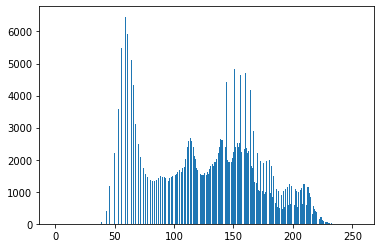

In [10]:
plt.bar(x, intensity)

## Exercise 05: Simple Thresholding

Perform simple thresholding on the image `FingerPrint.jpg`. Plot the histogram and observe the threshold value. You can use inbuilt function for thresholding.

In [11]:
I_fingerprint = cv2.imread('./Image Processing/FingerPrint.jpg', cv2.IMREAD_UNCHANGED)
print("Shape: ", I_fingerprint.shape)

Shape:  (480, 400)


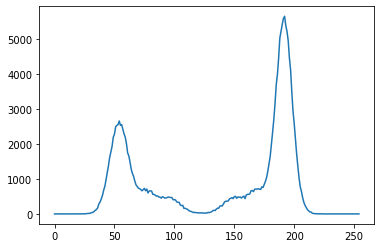

In [12]:
histogram1 = cv2.calcHist([I_fingerprint], [0], None, [255], [0, 256])
plt.plot(histogram1)

In [13]:
_, I_fingerprint_st = cv2.threshold(I_fingerprint, 160, 255, cv2.THRESH_BINARY)

cv2.imshow('Simple Thresholding', I_fingerprint_st)
cv2.waitKey(0)
cv2.destroyAllWindows()

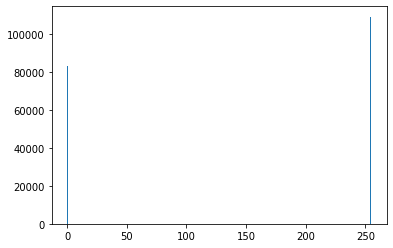

In [14]:
_ = plt.hist(I_fingerprint_st.ravel(), bins = 256)

Perform simple thresholding on the image `sudoku.jpeg` in grayscale. Plot the histogram and observe the threshold value. You can use an inbuilt function for thresholding.

In [15]:
I_sudoku = cv2.imread('./Image Processing/sudoku.jpeg', cv2.IMREAD_UNCHANGED)
print("Shape: ", I_sudoku.shape)

Shape:  (423, 419, 3)


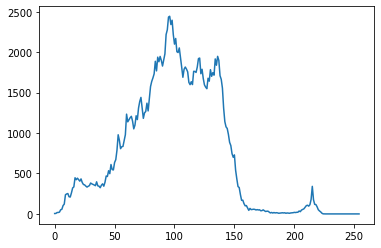

In [16]:
histogram2 = cv2.calcHist([I_sudoku], [0], None, [255], [0, 256])
plt.plot(histogram2)

In [17]:
_, I_sudoku_st = cv2.threshold(I_sudoku, 150, 255, cv2.THRESH_BINARY)

cv2.imshow('Simple Thresholding Fails for Sudoku', I_sudoku_st)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Exercise 05: Adaptive Thresholding


In [18]:
# I_sudoku_at = cv2.adaptiveThreshold(I_sudoku, 255, cv2.ADAPTIVE_THRESH_MEAN_C, 
#                                        cv2.THRESH_BINARY, 11, 2)

# cv2.imshow('Adaptive Mean Thresholding', I_sudoku_at)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

## Exercise 06: Naive Implementation of Convolution

Write a function which takes an image section and filter as an input and gives the convolution output. Take the filter to be np.array([[1,1,1],[1,1,1],[1,1,1]])/9. (Smoothing Filter)


In [19]:
I_bell_gs = cv2.imread('./Image Processing/bell.jpg', cv2.IMREAD_GRAYSCALE)
kernel = np.ones((3, 3)) / 9

def convolution(image, kernel):
    image_output = np.zeros_like(image)
    
    height, width = image.shape
    for i in range(1, height - 3):
        for j in range(1, width - 3): 
            image_output[i,j] = np.sum(kernel * image[i : i+3, j : j+3])
            
    return image_output

In [20]:
I_bell_smooth =  convolution(I_bell_gs, kernel)
cv2.imshow('Convolution', np.hstack([I_bell_gs, I_bell_smooth]))
cv2.waitKey(0)
cv2.destroyAllWindows()

## Exercise 07: Sharpening


In [21]:
sharpening_kernel = np.array([[1, 1, 1], [1, -8, 1], [1, 1, 1]])

I_bell_sharp =  convolution(I_bell_gs, sharpening_kernel)
cv2.imshow('Convolution', np.hstack([I_bell_gs, I_bell_sharp]))
cv2.waitKey(0)
cv2.destroyAllWindows()

## Exercise 08: Edge Detection (Sobel Filter)

Detect the vertical and horizontal edges in image `window.jpeg` using edge detection filters.

In [22]:
sobel_x_filter = np.array([[-1, 0, 1],[-2, 0, 2],[-1, 0, 1]])
sobel_y_filter = np.array([[-1, -2, -1],[0, 0, 0],[1, 2, 1]])

I_window = cv2.imread('./Image Processing/window.jpeg', cv2.IMREAD_UNCHANGED)

horizontal_edges = cv2.filter2D(I_window, -1, sobel_x_filter)
vertical_edges = cv2.filter2D(I_window, -1, sobel_y_filter)

cv2.imshow('', np.hstack([I_window, horizontal_edges, vertical_edges]))
cv2.waitKey(0)
cv2.destroyAllWindows()

## Exercise 09: Counting Windows

Count the number of windows in image `window.jpeg` using edge detection filters.

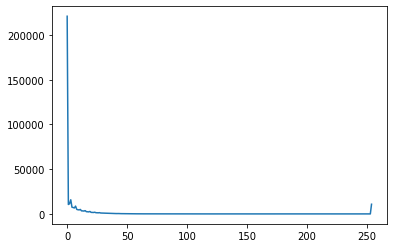

In [26]:
histogramA = cv2.calcHist([horizontal_edges], [0], None, [255], [0, 256])
plt.plot(histogramA)

_, I_horizontal_st = cv2.threshold(horizontal_edges, 165, 255, cv2.THRESH_BINARY)

cv2.imshow('Simple Thresholding', I_horizontal_st)
cv2.waitKey(0)
cv2.destroyAllWindows()

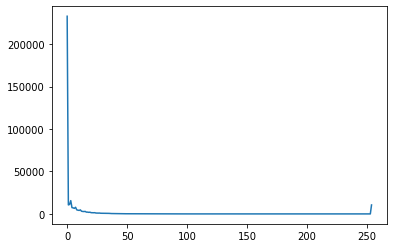

In [27]:
histogramB = cv2.calcHist([vertical_edges], [0], None, [255], [0, 256])
plt.plot(histogramB)

_, I_vertical_st = cv2.threshold(vertical_edges, 165, 255, cv2.THRESH_BINARY)

cv2.imshow('Simple Thresholding', I_vertical_st)
cv2.waitKey(0)
cv2.destroyAllWindows()